In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler, RobustScaler,MinMaxScaler

In [2]:
import colorama
from colorama import Fore, Style
from termcolor import colored
from termcolor import cprint

import warnings
warnings.filterwarnings('ignore')

In [3]:
import sklearn
import tensorflow as tf
import pickle

In [6]:
def missing_values(df):
    missing_number = df.isnull().sum().sort_values(ascending = False)
    missing_percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    missing_values = pd.concat([missing_number, missing_percent], axis = 1, keys = ['Missing_Number', 'Missing_Percent'])
    return missing_values[missing_values['Missing_Number']>0]
def first_looking(df):
    print(colored("Shape:", attrs=['bold']), df.shape,'\n',
          colored('*'*100, 'red', attrs=['bold']),
          colored("\nInfo:\n", attrs=['bold']), sep='')
    print(df.info(), '\n',
          colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Number of Uniques:\n", attrs=['bold']), df.nunique(),'\n',
          colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Missing Values:\n", attrs=['bold']), missing_values(df),'\n',
          colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("All Columns:", attrs=['bold']), list(df.columns),'\n',
          colored('*'*100, 'red', attrs=['bold']), sep='')

    print(colored("Descriptive Statistics \n", attrs=['bold']), df.describe().round(2),'\n',
          colored('*'*100, 'red', attrs=['bold']), sep='')

def first_look(df, col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum() * 100 / df.shape[0], 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].astype(str).nunique())
    print("shape_of_df    : ", df.shape)
    print("--------------------------------")
    print(df[col].value_counts(dropna=False))

def duplicate_values(df):
    print(colored("Duplicate check...", attrs=['bold']), sep='')
    duplicate_values = df.duplicated(subset=None, keep='first').sum()
    if duplicate_values > 0:
        df.drop_duplicates(keep='first', inplace=True)
        print(duplicate_values, colored(" Duplicates were dropped!"),'\n',
              colored('*'*100, 'red', attrs=['bold']), sep='')
    else:
        print(colored("There are no duplicates"),'\n',
              colored('*'*100, 'red', attrs=['bold']), sep='')





In [7]:
df0 = pd.read_csv(r'C:\Users\HDIT_03\Downloads\PYTHON\Data portfolio\Mall shoper segment\Mall_Customers.csv')
df_customer = df0.copy()
df_customer

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [8]:
first_looking(df_customer)
first_look(df_customer, df_customer.columns)
duplicate_values(df_customer)
print("Last Shape: ", df_customer.shape)

Shape:(200, 5)
****************************************************************************************************
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
****************************************************************************************************
Number of Uniques:
CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64
***********************************************************************

In [9]:
df_customer.rename(columns = {"CustomerID":"customer_id", "Gender":"gender", "Age":"age", "Annual Income (k$)": "income",
                       "Spending Score (1-100)":"score"}, inplace = True)

In [10]:
df_customer.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  200 non-null    int64 
 1   gender       200 non-null    object
 2   age          200 non-null    int64 
 3   income       200 non-null    int64 
 4   score        200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
df_customer.describe().T


,count,mean,std,min,25%,50%,75%,max
customer_id,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
income,200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
score,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


Considering that the means are larger than the standard deviations, we can assert that there is no significant risk of outliers.

In [12]:
import plotly.express as px
fig = px.imshow(df_customer.drop(columns = ['customer_id', 'gender']).corr(),
                height = 1000,
                width = 1000,
                range_color = [-1,1])
fig.show()

The highest correlation, with a value of -0.32, is observed between the 'age' and 'score' columns.

In [13]:
df_customer[df_customer["income"] == 137]

,customer_id,gender,age,income,score
198,199,Male,32,137,18
199,200,Male,30,137,83


In [14]:
df_customer[['age','income','score']].mean()

age       38.85
income    60.56
score     50.20
dtype: float64

In [15]:
df_customer.groupby('gender').agg({'age':'median', 'income':'median', 'score':'median'})

,age,income,score
gender,,,
Female,35.0,60.0,50.0
Male,37.0,62.5,50.0


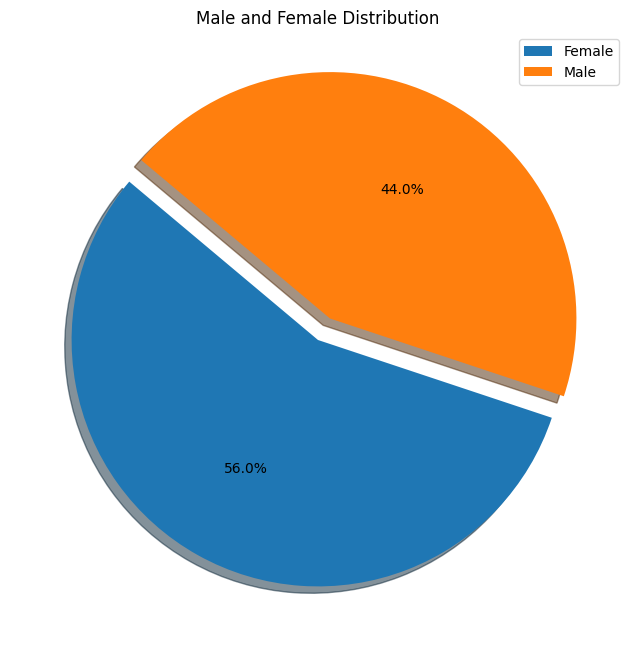

In [16]:
plt.figure(figsize = (8,8))
explode = [0, 0.1]
plt.pie(df_customer['gender'].value_counts(),
        explode = explode,
        autopct = '%1.1f%%',
        shadow = True,
        startangle = 140)
plt.legend(labels = ['Female', 'Male'])
plt.title('Male and Female Distribution')
plt.axis('off')
plt.show()

In [17]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category = DeprecationWarning)
warnings.filterwarnings('ignore', category = FutureWarning)
from sklearn.cluster import KMeans

In [19]:
#Function to compute Hopkins's statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
def hopkins(X, ratio = 0.05):
    if not isinstance(X, np.ndarray):
        X = X.values #Convert dataf to numpy array
    sample_size = int(X.shape[0] * ratio) #5%
    
    #A uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis = 0), X.max(axis = 0), (sample_size, X.shape[1]))
    #A random sample of size sample_size from the original data X
    random_indices = sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]
    #Initialise unsupervised learner for implementing neighbor searchers
    neigh = NearestNeighbors(n_neighbors = 2)
    nbrs = neigh.fit(X)
    #u_distances = nearest neighbour distances from uniform random sample
    u_distances, u_indices = nbrs.kneighbors(X_uniform_random_sample, n_neighbors = 2)
    u_distances = u_distances[:, 0] #distance to the first (nearest) neighbour
     #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[:, 1]
    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)
    #compute and return hopkins's statistic
    H = u_sum/(u_sum + w_sum)
    return H
    

In [20]:
df1=df_customer[["age", "score"]].copy()
df2=df_customer[["age", "score"]].copy()

In [21]:
result = []
for _ in range(10):
    result.append(hopkins(MinMaxScaler().fit_transform(df1), 1))
np.mean(result)

0.6921357382220666

In [22]:
result = []
for _ in range(10):
    result.append(hopkins(StandardScaler().fit_transform(df2), 1))
np.mean(result)

0.6899434238684152

In [23]:
X = df_customer[["age", "score"]]

In [24]:
X.head()

,age,score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [25]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [26]:
hopkins(X, 1)

0.6905086393117282

### Choosing the Optimal Number of Cluster

#### Elbow Method

In [27]:
ssd = []

K = range(2,10) 
for k in K:
    model = KMeans(n_clusters =k,
                   random_state=42)
    model.fit(X)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

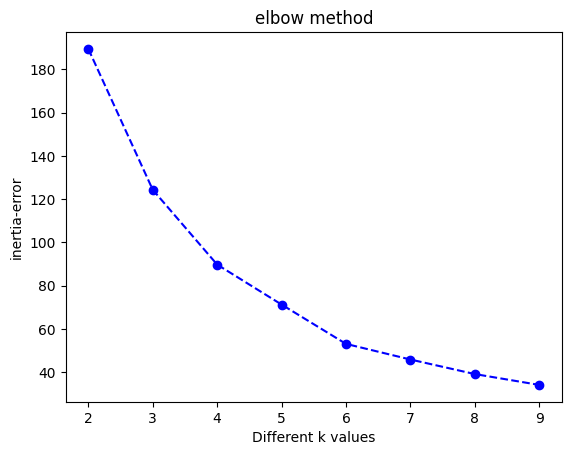

In [28]:
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow method")

##### An elbow is observed at 4 and 7, indicating a point of inflection. According to the elbow graph, selecting a higher number of clusters increases complexity. Therefore, it is more suitable to choose 4 clusters in this case.

In [29]:
ssd

[189.38749033992428,
 124.32628617921532,
 89.76521676586151,
 71.29556592219438,
 53.128438356294026,
 45.907104565678495,
 39.18519612139811,
 34.168841096196275]

In [30]:
-pd.Series(ssd).diff()

0          NaN
1    65.061204
2    34.561069
3    18.469651
4    18.167128
5     7.221334
6     6.721908
7     5.016355
dtype: float64

In [31]:
K = range(2, 10)
distortion = [] # bos bir liste atiyorum. 
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(X)
    distances = kmeanModel.transform(X) # distances from each observation to each cluster centroid. her bir gozlewmin kendi cluster centroid i arasindaki farki aldik.
    labels = kmeanModel.labels_
    result = []
    for i in range(k):
        cluster_distances = distances[labels == i, i] # distances from observations in each cluster to their own centroid
        result.append(np.mean(cluster_distances ** 2)) # calculate the mean of squared distances from observations in each cluster to their own centroid and add it to the result list
    distortion.append(sum(result)) # sum the means of all clusters and add it to the distortion list

Text(0.5, 1.0, 'elbow method')

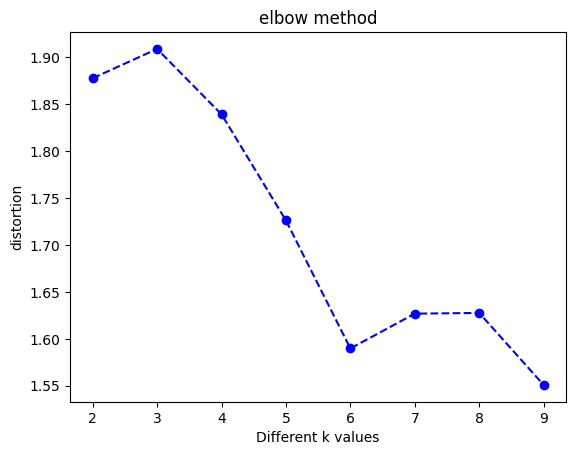

In [32]:
plt.plot(K, distortion, "bo--")
plt.xlabel("Different k values")
plt.ylabel("distortion")
plt.title("elbow method")

#### Silhouette Analysis

In [33]:
from sklearn.metrics import silhouette_score

In [34]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters,
                    random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4721271643062346
For n_clusters=3, the silhouette score is 0.43952990002101927
For n_clusters=4, the silhouette score is 0.4383860846531993
For n_clusters=5, the silhouette score is 0.44754858878462783
For n_clusters=6, the silhouette score is 0.4566283030197353
For n_clusters=7, the silhouette score is 0.4114882432090666
For n_clusters=8, the silhouette score is 0.4048295376259236


##### While examining silhouette scores, it is noted that the scores are relatively close to each other. However, when considered in conjunction with the elbow method, a cluster count of 4 appears to be suitable. It's worth mentioning that the silhouette score considers both intra-cluster and inter-cluster distances, aiming for a value close to 1 for better clustering results.

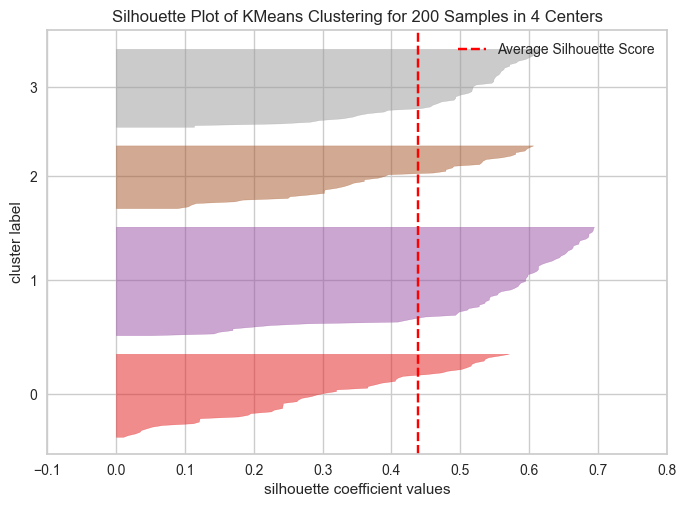

Indices with negative Silhouette scores: []


In [35]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(n_clusters=4,
                random_state=42)          # we decided n_clusters=3!
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof()

silhouette_scores = visualizer.silhouette_samples_

negative_silhouette_indices = np.where(silhouette_scores < 0)[0]

print("Indices with negative Silhouette scores:", negative_silhouette_indices)

In [36]:
visualizer.silhouette_samples_

array([0.50844679, 0.52676091, 0.24208287, 0.53580882, 0.53527818,
       0.49495581, 0.30197983, 0.58714298, 0.30189232, 0.57274153,
       0.10872012, 0.61729918, 0.35985368, 0.55910745, 0.33842387,
       0.53451211, 0.3194381 , 0.16903248, 0.1043463 , 0.62409449,
       0.3194381 , 0.51181434, 0.59971423, 0.59736572, 0.47801684,
       0.68160775, 0.17173763, 0.19770124, 0.11594401, 0.5975746 ,
       0.39468422, 0.40876393, 0.5322204 , 0.49227514, 0.57270522,
       0.52676091, 0.52716702, 0.59396305, 0.01065889, 0.42059604,
       0.35131848, 0.61045793, 0.11328764, 0.16936751, 0.24905105,
       0.22484339, 0.57079771, 0.47215211, 0.53370821, 0.51478535,
       0.54513375, 0.1417157 , 0.19116525, 0.60811708, 0.49276696,
       0.29514186, 0.57103209, 0.4902316 , 0.37610563, 0.55125025,
       0.51804138, 0.2620476 , 0.55730268, 0.60396265, 0.59384969,
       0.12162515, 0.23771338, 0.52241854, 0.12072956, 0.40922323,
       0.51734998, 0.328427  , 0.59900235, 0.61686629, 0.58329

In [37]:
clusters = model.fit_predict(X)
clusters

array([0, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 3, 1, 3, 1,
       2, 1, 3, 0, 0, 0, 3, 1, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0,
       3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0,
       1, 3, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3,
       3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 1, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 3, 1, 0, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 3, 1, 0, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       0, 1])

In [38]:
df_kmeans_age_score = df_customer.copy()
df_kmeans_age_score["clusters"] = clusters

In [39]:
df_kmeans_age_score

,customer_id,gender,age,income,score,clusters
0,1,Male,19,15,39,0
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,1
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,2
197,198,Male,32,126,74,1
198,199,Male,32,137,18,0


In [40]:
df_kmeans_age_score.loc[[18, 28, 44, 100]]

,customer_id,gender,age,income,score,clusters
18,19,Male,52,23,29,2
28,29,Female,40,29,31,2
44,45,Female,49,39,28,2
100,101,Female,23,62,41,0


In [41]:
df_kmeans_age_score.clusters.value_counts()

clusters
1    65
0    50
3    47
2    38
Name: count, dtype: int64

In [42]:
fig = px.scatter_3d(x=df_kmeans_age_score["score"],
                   y=df_kmeans_age_score["income"],
                   z=df_kmeans_age_score["age"],
                   color= df_kmeans_age_score.clusters,
                   labels = {"x": "Spending Score (1-100)",
                             "y": "Annual Income (k$)",
                             "z": "Age"},
                   hover_name= df_kmeans_age_score["income"])

fig.show()

##### When examined in three dimensions, data points become more distinguishable according to clusters.

Text(0.5, 1.0, 'Distribution of clusters')

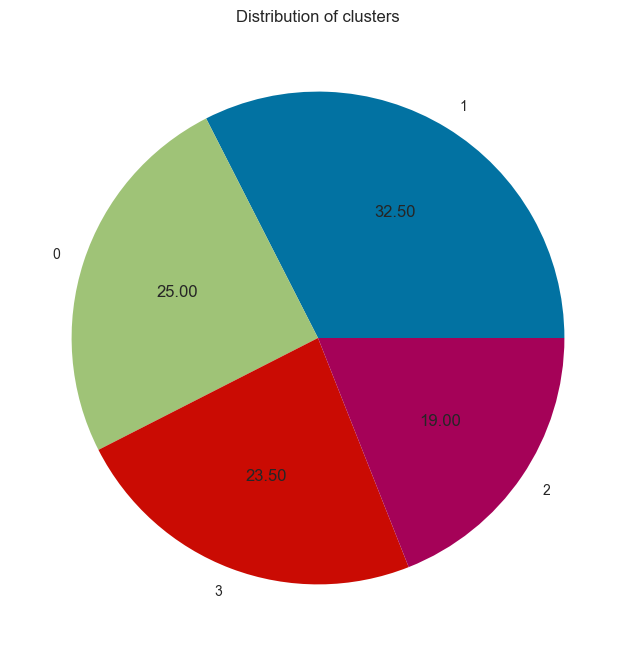

In [43]:
df_kmeans_age_score["clusters"].value_counts().plot(kind="pie", autopct='%.2f', figsize=[8,8], label="")
plt.title('Distribution of clusters')

##### It is observed that the highest number of individuals is in Cluster 1, while the lowest number is in Cluster 2.

#### Visualizing and Labeling All the Clusters

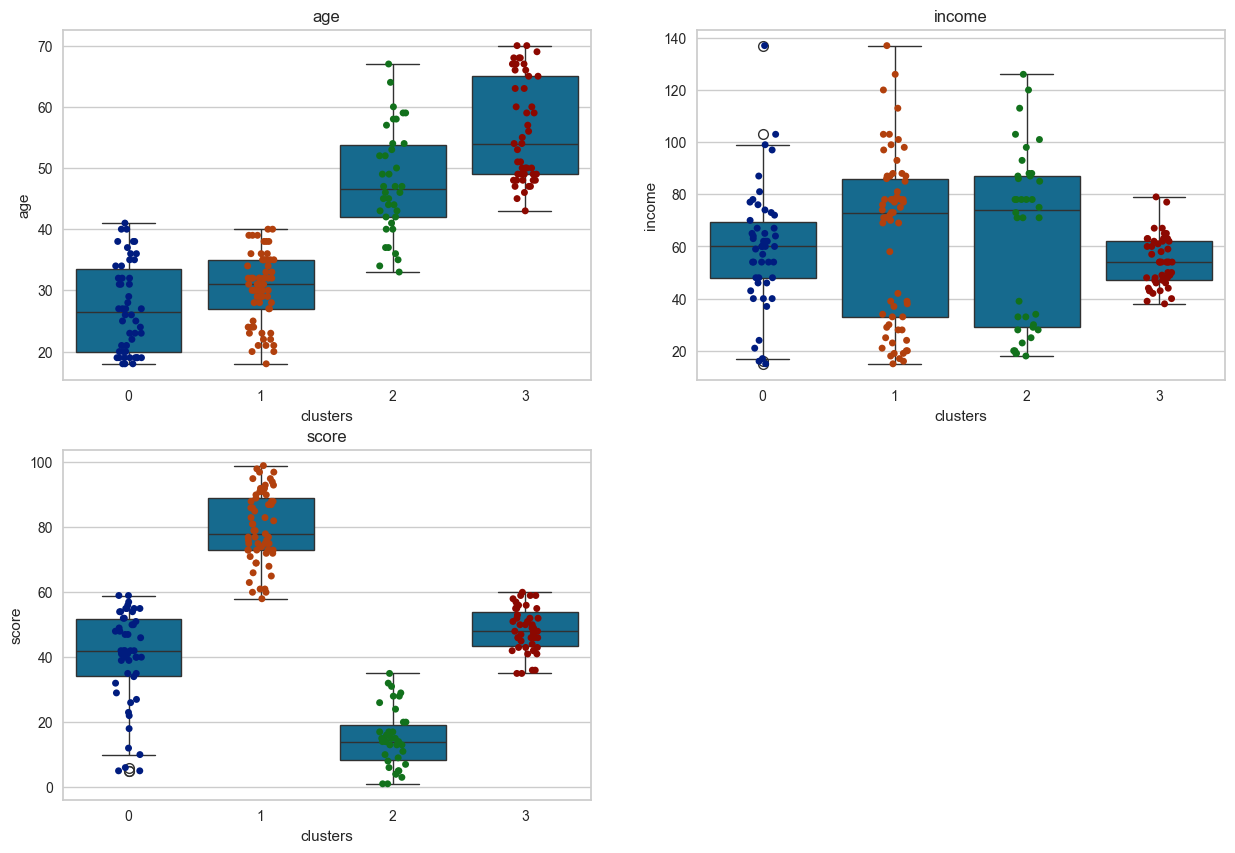

In [44]:
numeric_columns = df_kmeans_age_score.drop([
    'clusters','customer_id'], axis=1).select_dtypes(include='number').columns

num_plots = len(numeric_columns)
num_cols = 2

num_rows = (num_plots + num_cols - 1) // num_cols
plt.figure(figsize=(15, num_rows * 5))

for i, feature in enumerate(numeric_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=feature, x="clusters", data=df_kmeans_age_score)
    sns.stripplot(y=feature, x="clusters", data=df_kmeans_age_score, palette="dark", size=5)
    plt.title(feature)


##### In Cluster 0, individuals are observed to have moderate to low ages, moderate incomes, and moderate scores. Encouraging increased spending for this cluster could be beneficial. Cluster 1 comprises individuals with moderate ages, low to moderate incomes, and the highest scores. Despite their high spending, it may be noted that the revenue generated by this cluster is relatively low. Cluster 2 consists of individuals with moderate ages, low to moderate incomes, and the lowest scores. Campaigns targeting this cluster could potentially increase their spending.In Cluster 3, individuals are of moderate to older ages, with moderate incomes and scores. Various campaigns could be designed to boost spending for this group.

<Figure size 2000x1000 with 0 Axes>

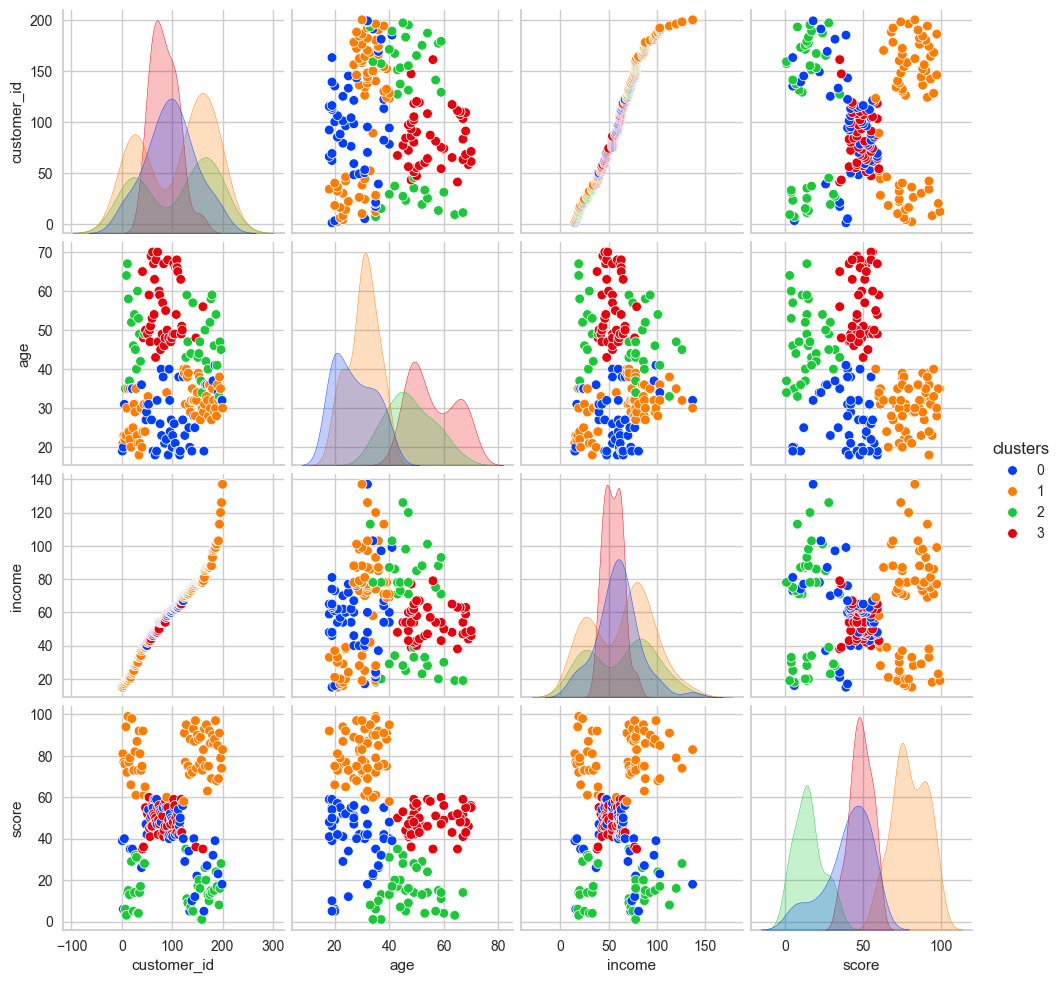

In [45]:
plt.figure(figsize=(20,10))
sns.pairplot(data=df_kmeans_age_score, hue="clusters", palette="bright")

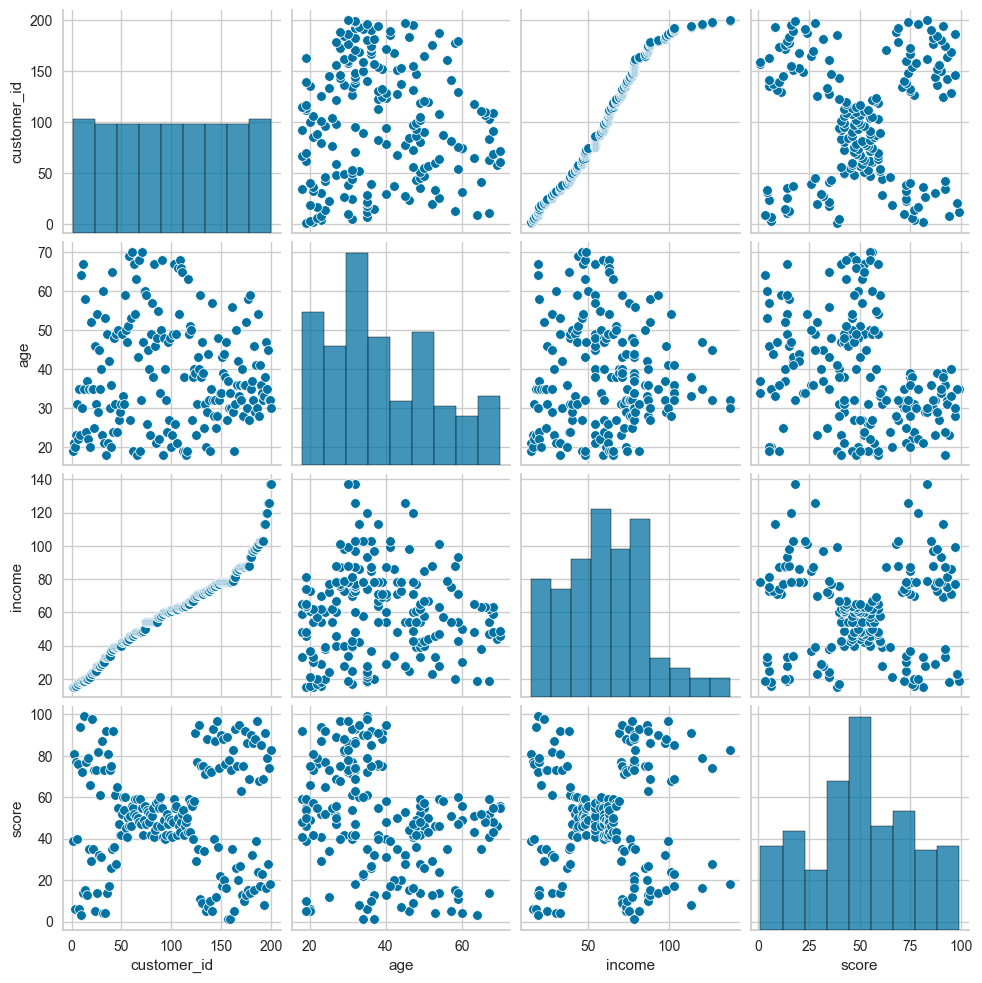

In [46]:
sns.pairplot(df_customer)
plt.show()

#### Clustering based on Age and Spending Score 

#### Hopkins Test

In [47]:
df1=df_customer[["age", "score"]].copy()
df2=df_customer[["age", "score"]].copy()

In [48]:
result = []
for _ in range(10):
    result.append(hopkins(MinMaxScaler().fit_transform(df1), 1))
np.mean(result)

0.6869173586071222

In [49]:
result = []
for _ in range(10):
    result.append(hopkins(StandardScaler().fit_transform(df2), 1))
np.mean(result)

0.69208627788538

In [50]:
X_age_score = df_customer[["age", "score"]].copy()

In [51]:
X_age_score

,age,score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [52]:
scaler_minmax = MinMaxScaler()
X_age_score = scaler_minmax.fit_transform(X_age_score)

In [53]:
hopkins(X_age_score, 1)

0.6904098241178445

In [54]:
from scipy.cluster.hierarchy import dendrogram, linkage

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [55.0, 55.0, 65.0, 65.0],
  [40.0, 40.0, 60.0, 60.0],
  [12.5, 12.5, 50.0, 50.0],
  [75.0, 75.0, 85.0, 85.0],
  [95.0, 95.0, 105.0, 105.0],
  [80.0, 80.0, 100.0, 100.0],
  [115.0, 115.0, 125.0, 125.0],
  [90.0, 90.0, 120.0, 120.0],
  [135.0, 135.0, 145.0, 145.0],
  [155.0, 155.0, 165.0, 165.0],
  [140.0, 140.0, 160.0, 160.0],
  [175.0, 175.0, 185.0, 185.0],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [180.0, 180.0, 202.5, 202.5],
  [150.0, 150.0, 191.25, 191.25],
  [105.0, 105.0, 170.625, 170.625],
  [31.25, 31.25, 137.8125, 137.8125],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [265.0, 265.0, 282.5, 282.5],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [273.75, 273.75, 312.5, 312.5],
  [255.0, 255.0, 293.125, 293.125],
  [232.5, 232.5, 274.0625, 274.0625],
  [335.0, 

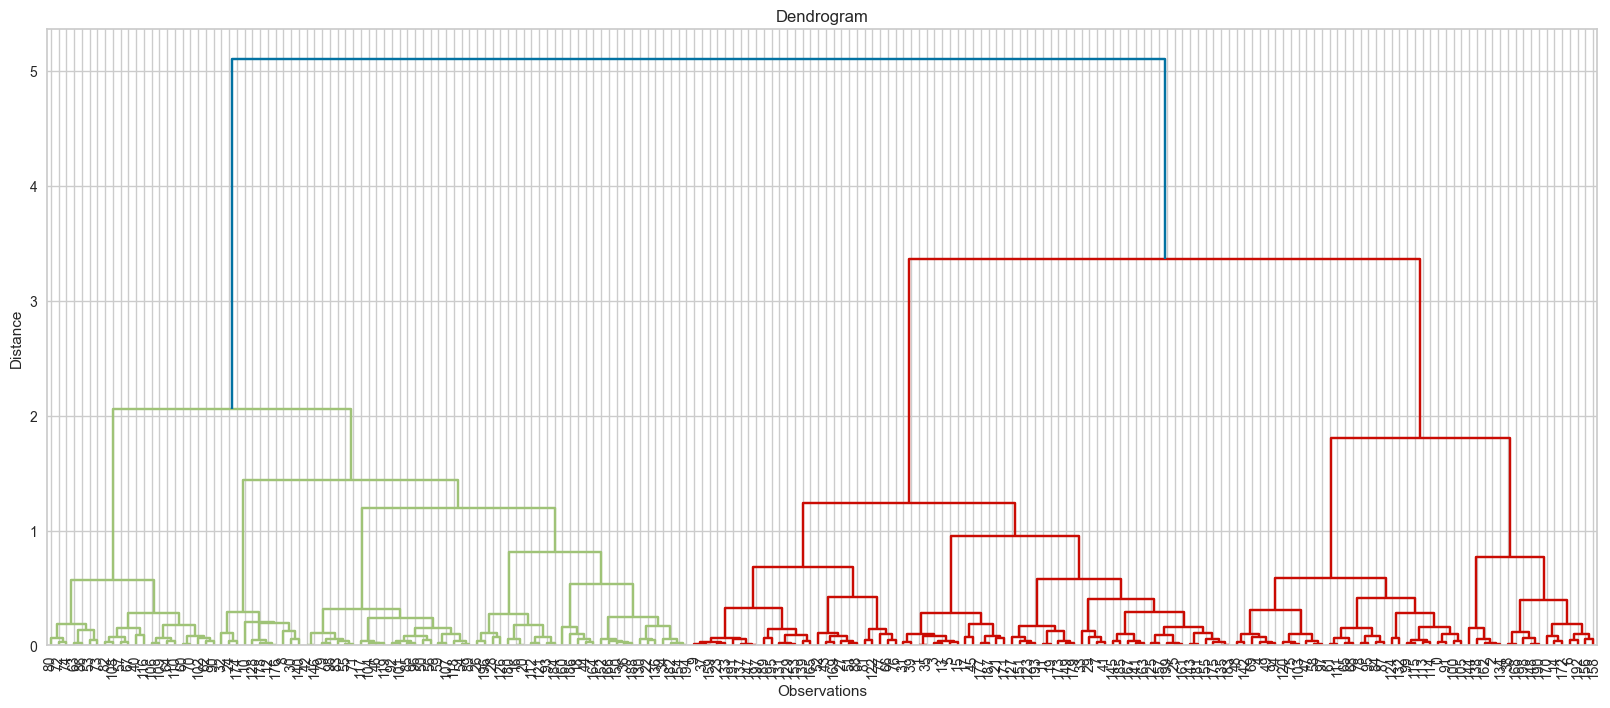

In [55]:
hc_ward_age = linkage(y=X_age_score, method="ward") 
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward_age, leaf_font_size = 10)

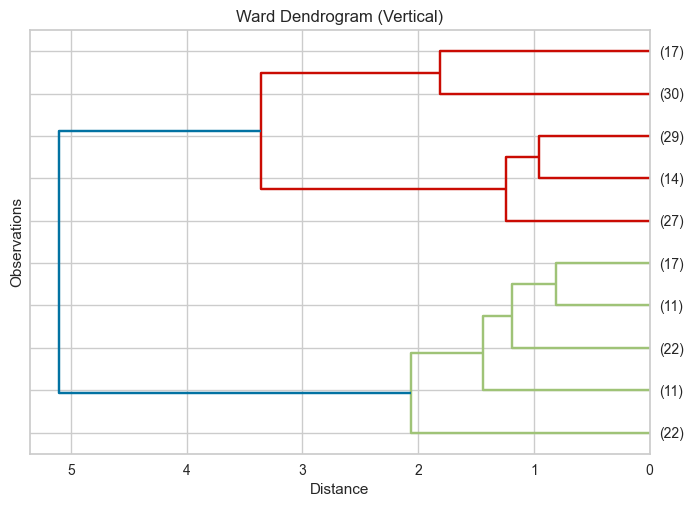

In [53]:
plt.title("Ward Dendrogram (Vertical)")
plt.xlabel("Distance")
plt.ylabel("Observations")
dendrogram(hc_ward_age, leaf_font_size=10, truncate_mode='lastp', p=10, orientation='left')

plt.show()

#### Clustering based on Annual Income and Spending Score

#### Hopkins Test

In [54]:
df1=df_customer[["income", "score"]].copy()
df2=df_customer[["income", "score"]].copy()

In [55]:
result = []
for _ in range(10):
    result.append(hopkins(MinMaxScaler().fit_transform(df1), 1))
np.mean(result)

0.7049644861855284

In [56]:
X_income_score = df_customer[["income", "score"]].copy()

In [57]:
X_income_score

,income,score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [58]:
scaler_standard = StandardScaler()
X_income_score = scaler_standard.fit_transform(X_income_score)

In [59]:
hopkins(X_income_score, 1)

0.7205433198612043

In [60]:
X_income_score

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [55.0, 55.0, 72.5, 72.5],
  [45.0, 45.0, 63.75, 63.75],
  [35.0, 35.0, 54.375, 54.375],
  [12.5, 12.5, 44.6875, 44.6875],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [165.0, 165.0, 175.0, 175.0],
  [142.5, 142.5, 170.0, 170.0],
  [125.0, 125.0, 156.25, 156.25],
  [185.0, 185.0, 195.0, 195.0],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [190.0, 190.0, 212.5, 212.5],
  [140.625, 140.625, 201.25, 201.25],
  [102.5, 102.5, 170.9375, 170.9375],
  [235.0, 235.0, 245.0, 245.0],
  [255.0, 255.0, 265.0, 265.0],
  [240.0, 240.0, 260.0, 260.0],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [282.5, 282.5, 312.5, 312.5],
  [250.0, 250.0, 297.5, 297.5],
  [335.0, 335.0, 345.0, 345.0],
  [355.0

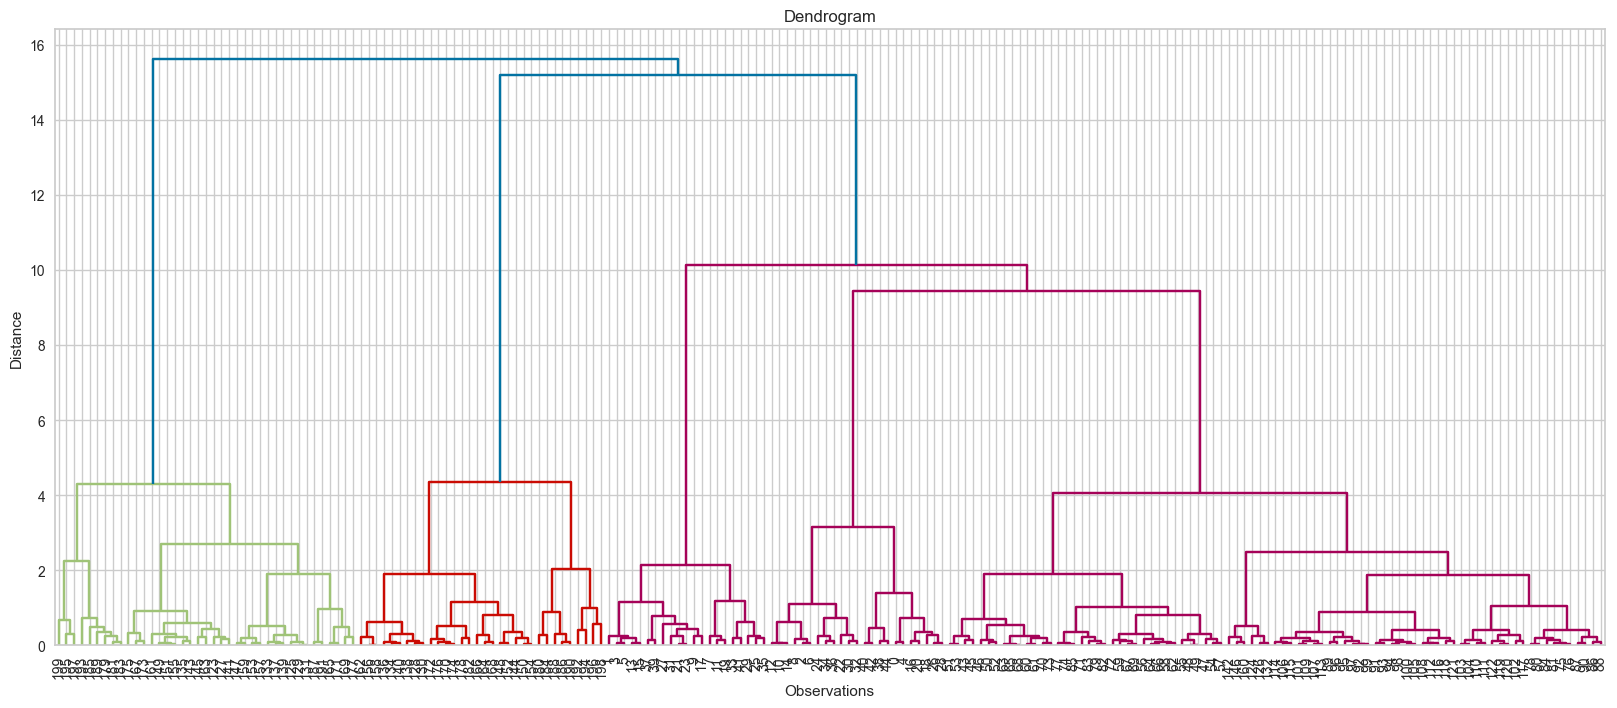

In [61]:
hc_ward_income = linkage(y=X_income_score, method="ward") 
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward_income, leaf_font_size = 10)

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [65.0, 65.0, 75.0, 75.0],
  [85.0, 85.0, 95.0, 95.0],
  [70.0, 70.0, 90.0, 90.0],
  [55.0, 55.0, 80.0, 80.0],
  [40.0, 40.0, 67.5, 67.5],
  [12.5, 12.5, 53.75, 53.75]],
 'dcoord': [[0.0, 2.6981104060399033, 2.6981104060399033, 0.0],
  [0.0, 4.308135290259197, 4.308135290259197, 2.6981104060399033],
  [0.0, 4.354422154062322, 4.354422154062322, 0.0],
  [0.0, 3.1503252052178836, 3.1503252052178836, 0.0],
  [0.0, 4.072546326682612, 4.072546326682612, 0.0],
  [3.1503252052178836,
   9.453352907296042,
   9.453352907296042,
   4.072546326682612],
  [0.0, 10.141263141237042, 10.141263141237042, 9.453352907296042],
  [4.354422154062322,
   15.186189387508165,
   15.186189387508165,
   10.141263141237042],
  [4.308135290259197,
   15.624837423662637,
   15.624837423662637,
   15.186189387508165]],
 'ivl': ['(9)',
  '(14)',
  '(16)',
  '(23)',
  '(9)',
  '(21)',
  '(12)',
  '(11)',
  '(36)',
  '(49)'],

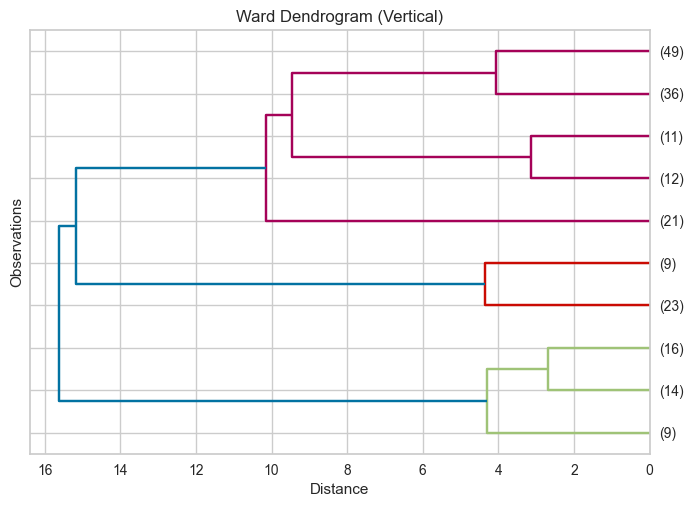

In [62]:
plt.title("Ward Dendrogram (Vertical)")
plt.xlabel("Distance")
plt.ylabel("Observations")
dendrogram(hc_ward_income, leaf_font_size=10, truncate_mode='lastp', p=10, orientation='left')

#### Apply Agglomerative Clustering

#### Age and Spending Score

##### Silhouette Analysis 

In [63]:
from sklearn.cluster import AgglomerativeClustering

In [64]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit(X_age_score)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X_age_score, model.labels_)}')

Silhouette Score for 2 clusters: 0.41699937625242867
Silhouette Score for 3 clusters: 0.417124576652748
Silhouette Score for 4 clusters: 0.3898644314748176
Silhouette Score for 5 clusters: 0.37668241046330797
Silhouette Score for 6 clusters: 0.39920932010291066
Silhouette Score for 7 clusters: 0.3589298217276204
Silhouette Score for 8 clusters: 0.3611306861915168
Silhouette Score for 9 clusters: 0.3657953810746083


In [68]:
model_age_score = AgglomerativeClustering(n_clusters=4,
                                metric="euclidean",
                                linkage="ward")
# We run the model with default values.

model_age_score.fit_predict(X_age_score) # model_age_score.labels_
# The hierarchical clusstar in k-means does not have a predict property.

array([0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 3, 2, 1, 2,
       1, 2, 1, 0, 0, 0, 1, 2, 2, 3, 1, 1, 1, 3, 0, 1, 3, 0, 3, 3, 3, 0,
       2, 3, 0, 0, 3, 1, 3, 3, 3, 0, 2, 2, 0, 1, 3, 2, 3, 1, 0, 1, 3, 0,
       2, 1, 3, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 3, 0, 1, 0, 3, 1, 3, 3,
       3, 0, 1, 0, 0, 0, 3, 1, 1, 1, 0, 1, 2, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       1, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2, 1, 2, 1, 2,
       0, 2], dtype=int64)

In [65]:
from sklearn.metrics import silhouette_samples
model = AgglomerativeClustering(n_clusters=4, metric="euclidean", linkage="ward")
labels = model.fit_predict(X_age_score)

silhouette_scores = silhouette_samples(X_age_score, labels)

silhouette_scores_array = np.array(silhouette_scores)

silhouette_scores_array

array([ 0.48527462,  0.52413866,  0.39986956,  0.53921644,  0.39389891,
        0.50088066,  0.05292363,  0.57958217,  0.12071425,  0.60084475,
       -0.09260957,  0.62032054,  0.25154078,  0.56263659, -0.05715834,
        0.53420987, -0.14508191,  0.21305193,  0.37638218,  0.6267759 ,
       -0.14508191,  0.52881088,  0.3872913 ,  0.62284524,  0.38847121,
        0.67835275,  0.51608868,  0.3437521 ,  0.27499039,  0.58986896,
        0.22919636,  0.42354181,  0.38832216,  0.48659141,  0.4950827 ,
        0.52413866,  0.34693912,  0.61690887,  0.02170213,  0.42939105,
        0.4881367 ,  0.60216501,  0.45214521,  0.30629568,  0.4854565 ,
        0.28960302, -0.03387863,  0.36566379,  0.4362433 ,  0.39696006,
        0.11078949,  0.29777356, -0.0186804 ,  0.57480304,  0.22512254,
        0.41873572,  0.01591189,  0.70138868,  0.24727773, -0.06261525,
        0.70157605,  0.2021953 ,  0.75303631,  0.33405994,  0.72061578,
        0.06448591, -0.30801052,  0.73218216,  0.05575441,  0.24

In [66]:
df_hie_age_score = df_customer.copy()
df_hie_age_score

,customer_id,gender,age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [69]:
df_hie_age_score["clusters"] = model_age_score.labels_
df_hie_age_score

,customer_id,gender,age,income,score,clusters
0,1,Male,19,15,39,0
1,2,Male,21,15,81,2
2,3,Female,20,16,6,0
3,4,Female,23,16,77,2
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,1
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


#### Annual Income and Spending Score 

#### Silhouette Analysis

In [70]:
from sklearn.metrics import silhouette_score

In [71]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit(X_income_score)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X_income_score, model.labels_)}')

Silhouette Score for 2 clusters: 0.3842337621772661
Silhouette Score for 3 clusters: 0.4610481446570447
Silhouette Score for 4 clusters: 0.4925507715349343
Silhouette Score for 5 clusters: 0.5538089226688662
Silhouette Score for 6 clusters: 0.5386761871036926
Silhouette Score for 7 clusters: 0.5197949293475768
Silhouette Score for 8 clusters: 0.4308617778221774
Silhouette Score for 9 clusters: 0.43768997758154127


##### Based on the dendrogram, it is known that distances between 5 clusters are relatively high. Additionally, when examining the silhouette score, choosing 5 clusters is supported by the dendrogram information.

In [72]:
from sklearn.cluster import AgglomerativeClustering

In [73]:
model_income_score = AgglomerativeClustering(n_clusters=5,
                                metric="euclidean",
                                linkage="ward")
# We run the model with default values.

model_income_score.fit_predict(X_income_score) # model_age_score.labels_
# The hierarchical clusstar in k-means does not have a predict property.

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

In [74]:
from sklearn.metrics import silhouette_samples
model = AgglomerativeClustering(n_clusters=5, metric="euclidean", linkage="ward")
labels = model.fit_predict(X_income_score)

silhouette_scores = silhouette_samples(X_income_score, labels)

silhouette_scores_array = np.array(silhouette_scores)

silhouette_scores_array

array([ 0.41907589,  0.7124834 ,  0.64085381,  0.71138228,  0.39440719,
        0.71234506,  0.64978002,  0.67595311,  0.6305384 ,  0.6742126 ,
        0.67904459,  0.63917391,  0.68117657,  0.73283837,  0.68172522,
        0.74031432,  0.48803415,  0.54872929,  0.5827615 ,  0.6471626 ,
        0.46906997,  0.68616792,  0.64208685,  0.67970666,  0.66265111,
        0.71756476,  0.49332586,  0.29264582,  0.49993077,  0.69892814,
        0.60699035,  0.61617847,  0.57811138,  0.63231072,  0.61157293,
        0.64954092,  0.58890596,  0.5292479 ,  0.42859483,  0.48582852,
        0.11045032,  0.56012561,  0.01160845,  0.1279049 ,  0.32175925,
       -0.08419272,  0.38705701,  0.41472433,  0.27195791,  0.27195791,
        0.51444868,  0.30266849,  0.50894887,  0.34027439,  0.46971734,
        0.35243386,  0.57959325,  0.52116755,  0.62871465,  0.57350046,
        0.54856185,  0.56964645,  0.63825875,  0.49523028,  0.66680057,
        0.51883   ,  0.66422704,  0.64577468,  0.51883   ,  0.63

In [75]:
df_hie_income_score = df_customer.copy()
df_hie_income_score

,customer_id,gender,age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [76]:
df_hie_income_score["clusters"] = model_income_score.labels_
df_hie_income_score

,customer_id,gender,age,income,score,clusters
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,0
197,198,Male,32,126,74,1
198,199,Male,32,137,18,0


In [77]:
df_hie_income_score.clusters.value_counts()

clusters
2    85
1    39
0    32
4    23
3    21
Name: count, dtype: int64

In [80]:
df_kmeans_income_score = df_customer.copy()
df_kmeans_income_score["clusters"] = clusters

In [81]:
df_kmeans_income_score.loc[[42, 146]]

,customer_id,gender,age,income,score,clusters
42,43,Male,48,39,36,3
146,147,Male,48,77,36,3


### Visualizing and Labeling All the Clusters

#### Age and Spending Score

In [ ]:
plt.figure(figsize=(20, 10))

plt.subplot(121)
sns.scatterplot(x='age',
                y='score',
                hue='clusters',
                data=df_kmeans_age_score,
                palette=['green', 'orange', 'brown', 'dodgerblue'])
plt.title("K_means")
plt.subplot(122)
sns.scatterplot(x='age',
                y='score',
                hue='clusters',
                data=df_hie_age_score,
                palette=['dodgerblue', 'green', 'orange', 'brown'])
plt.title("Agg")

##### Considering the smoother distribution in K-means, it is more appropriate to use K-means in this context.

#### Annual Income and Spending Score

Text(0.5, 1.0, 'Agg')

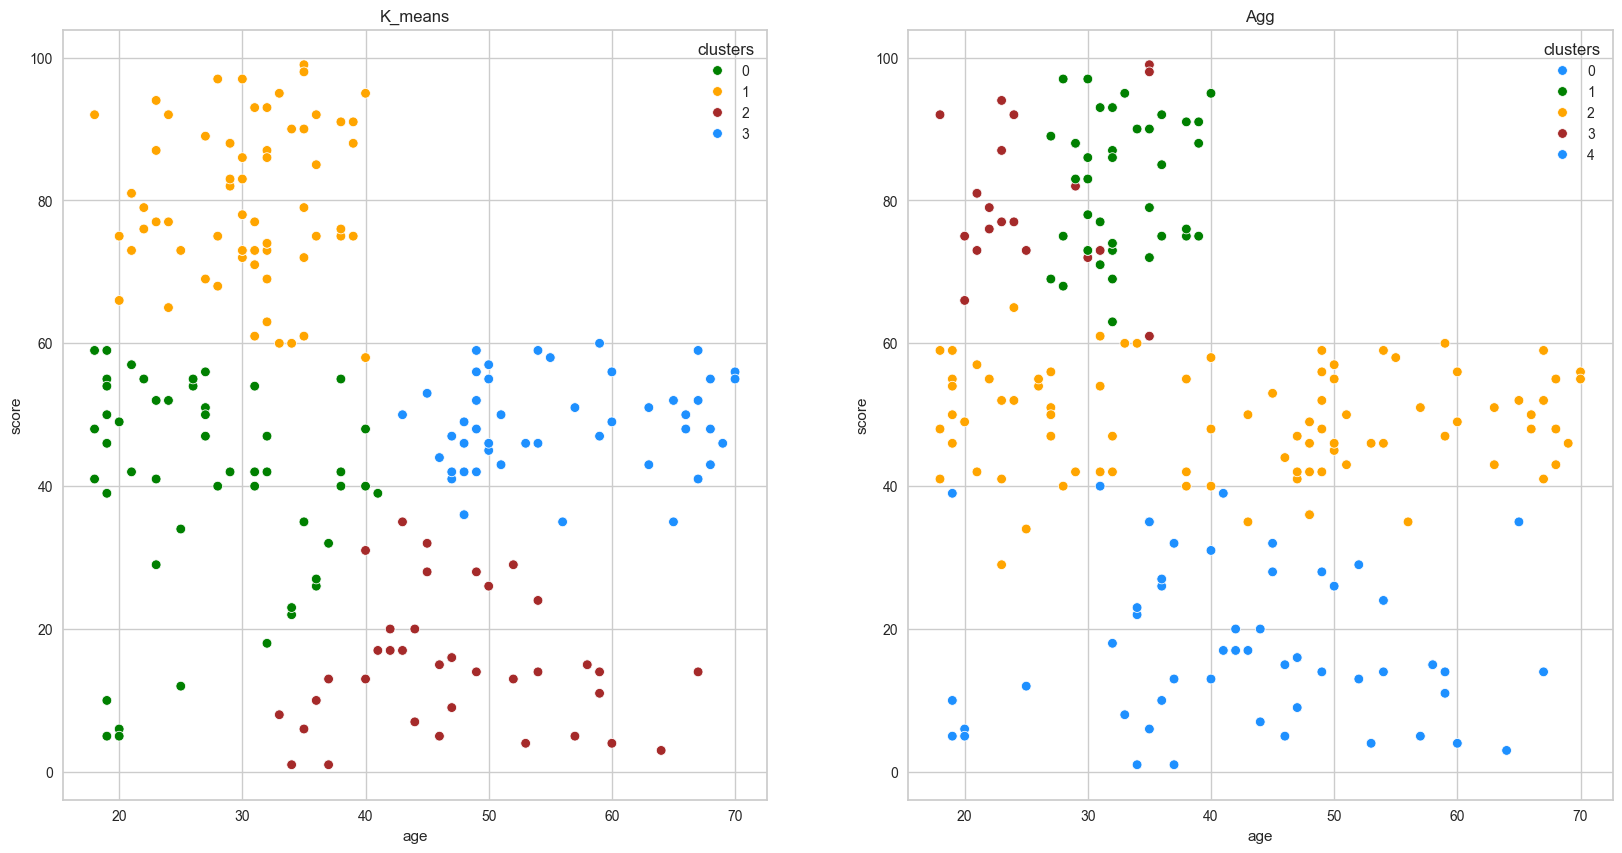

In [83]:
plt.figure(figsize=(20, 10))

plt.subplot(121)
sns.scatterplot(x='age',
                y='score',
                hue='clusters',
                data=df_kmeans_income_score,
                palette=['green', 'orange', 'brown', 'dodgerblue'])
plt.title("K_means")
plt.subplot(122)
sns.scatterplot(x='age',
                y='score',
                hue='clusters',
                data=df_hie_income_score,
                palette=['dodgerblue', 'green', 'orange', 'brown'])
plt.title("Agg")

##### As hierarchical clustering provides a more consistent classification, it is more suitable to choose it in this context.

### Interpretation based on Age and Spending Score

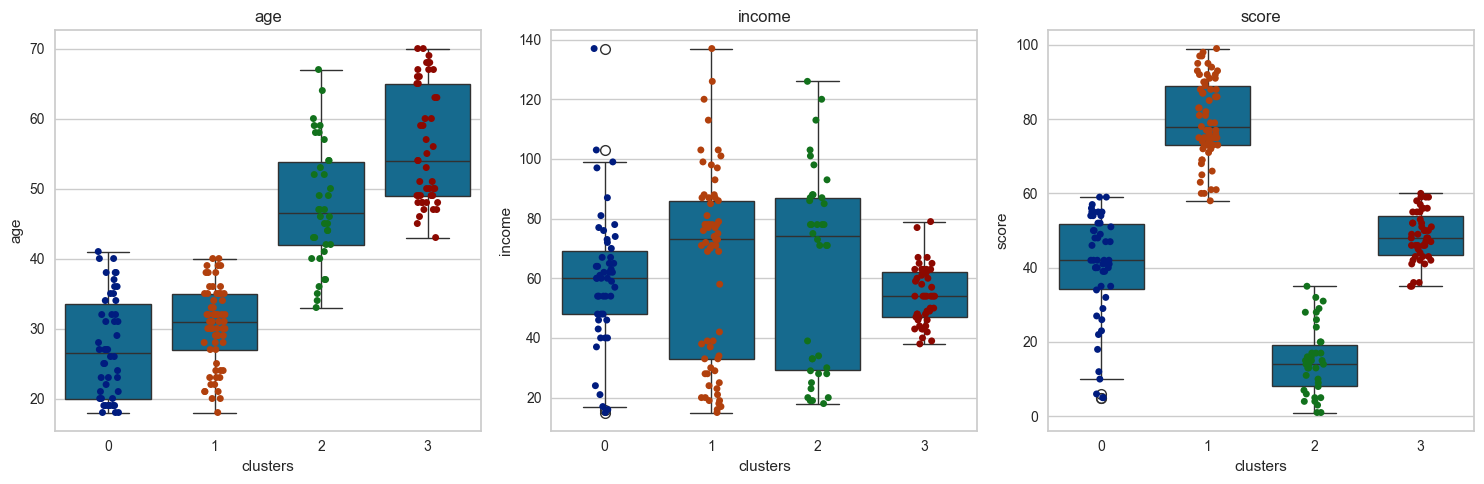

In [84]:
numeric_columns = df_kmeans_age_score.drop(['clusters', 'customer_id'], axis=1).select_dtypes(include='number').columns

num_plots = len(numeric_columns)
num_cols = 3

num_rows = (num_plots + num_cols - 1) // num_cols
plt.figure(figsize=(15, num_rows * 5))

for i, feature in enumerate(numeric_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=feature, x="clusters", data=df_kmeans_age_score)
    sns.stripplot(y=feature, x="clusters", data=df_kmeans_age_score, palette="dark", size=5)
    plt.title(feature)

plt.tight_layout()
plt.show()

##### In Cluster 0, individuals are observed to have moderate to low ages, moderate incomes, and moderate scores. Encouraging increased spending for this cluster could be beneficial. Cluster 1 comprises individuals with moderate ages, low to moderate incomes, and the highest scores. Despite their high spending, it may be noted that the revenue generated by this cluster is relatively low. Cluster 2 consists of individuals with moderate ages, low to moderate incomes, and the lowest scores. Campaigns targeting this cluster could potentially increase their spending. In Cluster 3, individuals are of moderate to older ages, with moderate incomes and scores. Various campaigns could be designed to boost spending for this group.

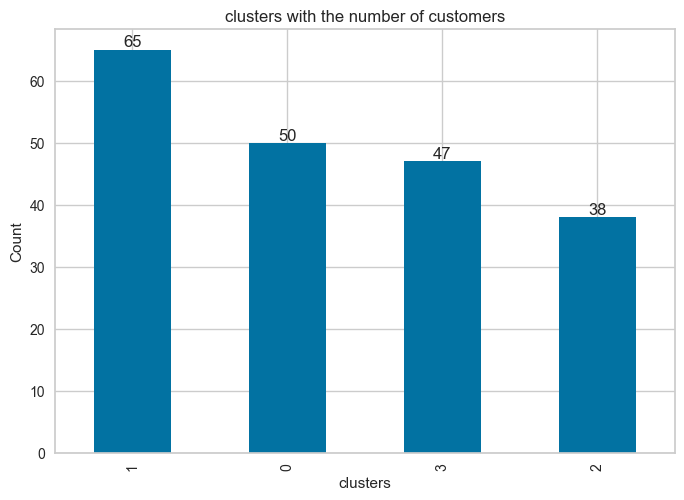

In [85]:
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = df_kmeans_age_score.clusters.value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.show()

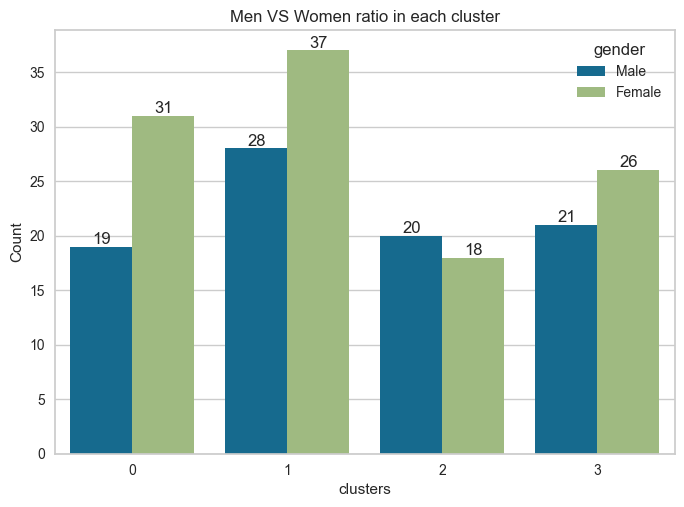

In [86]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax = sns.countplot(x=df_kmeans_age_score.clusters, hue=df_kmeans_age_score.gender)
for p in ax.containers:
    ax.bar_label(p)
plt.show()

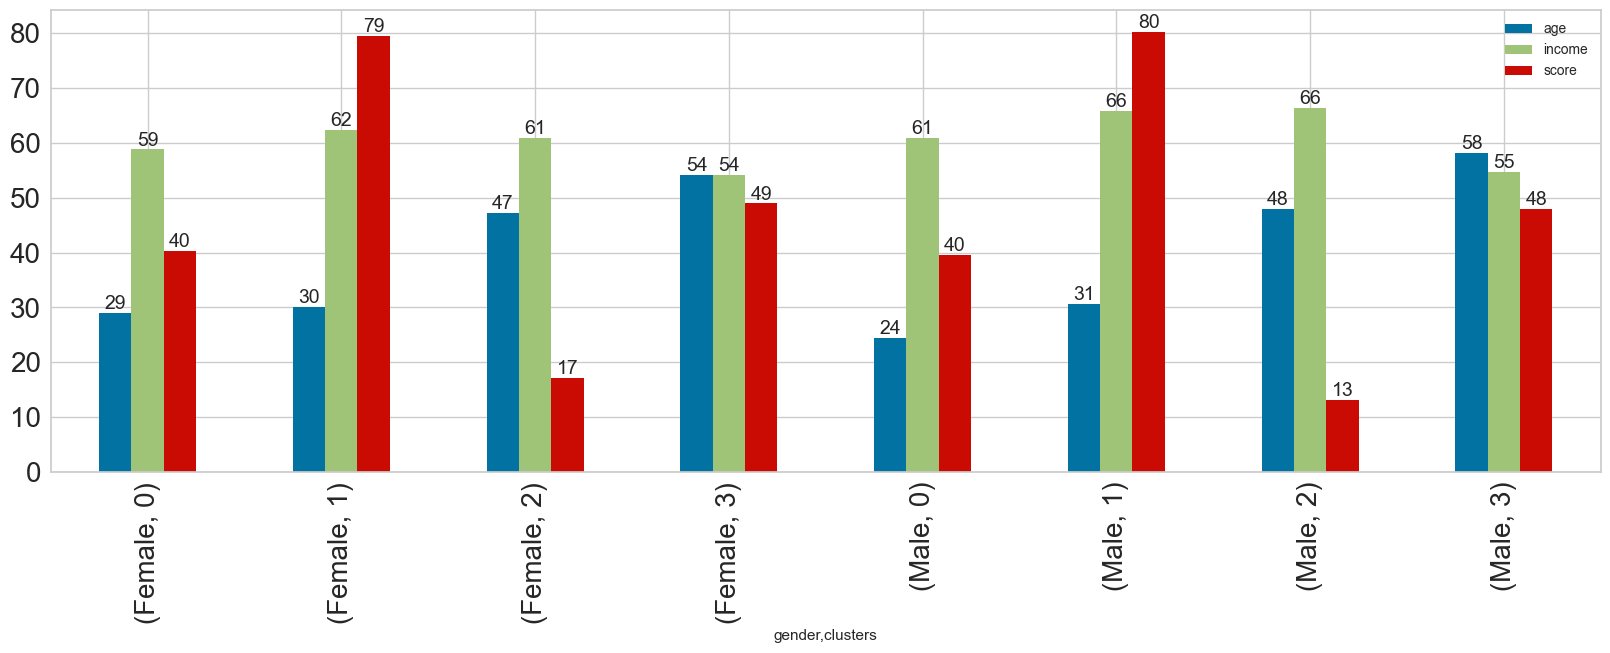

In [88]:
ax = df_kmeans_age_score.drop("customer_id", axis = 1).groupby(["gender", "clusters"]).mean().plot(kind="bar",
                                                                                figsize=(20,6),
                                                                                fontsize=20)
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=14)

####  Interpretation based on Annual Income and Spending Score

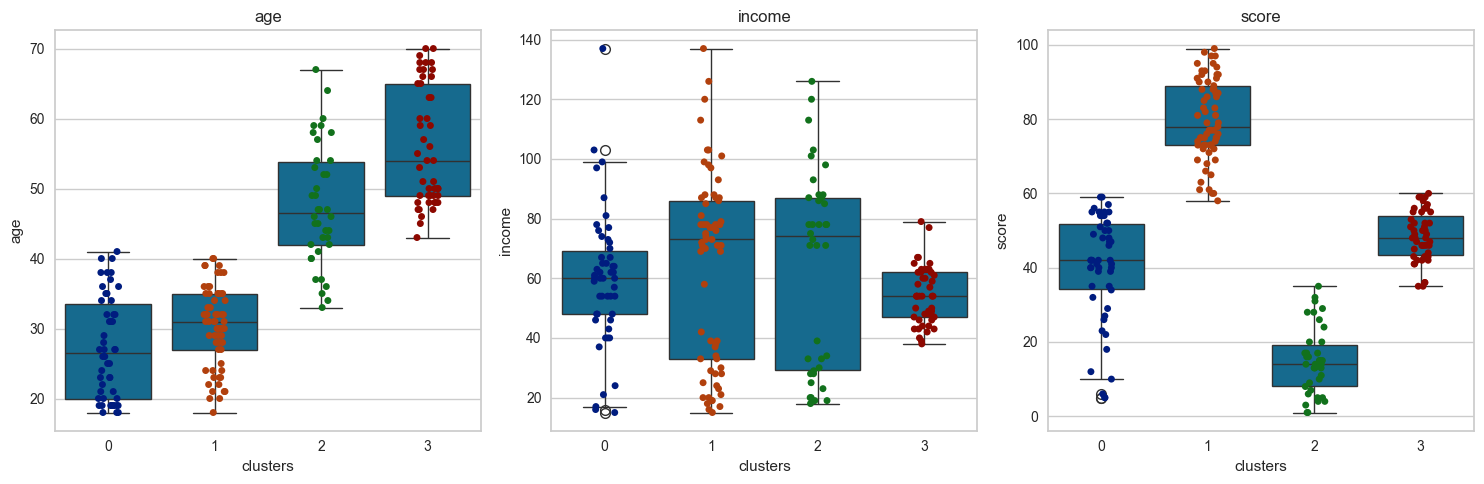

In [89]:
numeric_columns = df_hie_income_score.drop(['clusters', 'customer_id'], axis=1).select_dtypes(include='number').columns

num_plots = len(numeric_columns)
num_cols = 3

num_rows = (num_plots + num_cols - 1) // num_cols
plt.figure(figsize=(15, num_rows * 5))

for i, feature in enumerate(numeric_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=feature, x="clusters", data=df_kmeans_age_score)
    sns.stripplot(y=feature, x="clusters", data=df_kmeans_age_score, palette="dark", size=5)
    plt.title(feature)

plt.tight_layout()
plt.show()

##### In Cluster 0, individuals are observed to have moderate to low ages, moderate incomes, and moderate scores. Encouraging increased spending for this cluster could be beneficial. Cluster 1 comprises individuals with moderate ages, low to moderate incomes, and the highest scores. Despite their high spending, it may be noted that the revenue generated by this cluster is relatively low. Cluster 2 consists of individuals with moderate ages, low to moderate incomes, and the lowest scores. Campaigns targeting this cluster could potentially increase their spending. In Cluster 3, individuals are of moderate to older ages, with moderate incomes and scores. Various campaigns could be designed to boost spending for this group. The analysis highlights distinct characteristics across clusters, indicating potential strategies to improve engagement and spending patterns through targeted campaigns.



[Text(0, 0, '85'),
 Text(0, 0, '39'),
 Text(0, 0, '32'),
 Text(0, 0, '23'),
 Text(0, 0, '21')]

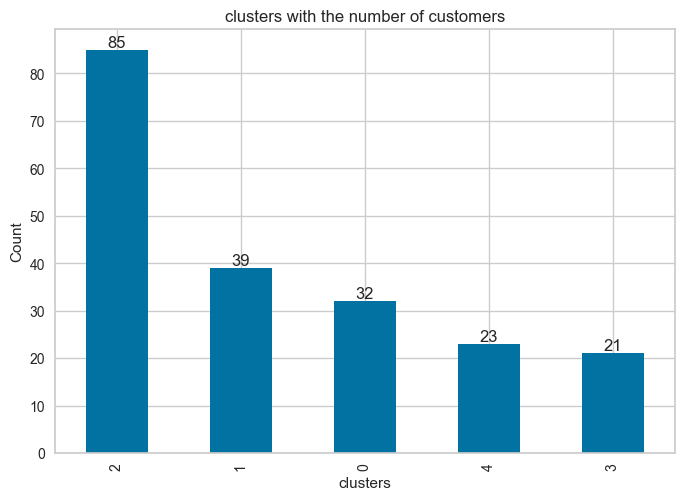

In [90]:
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = df_hie_income_score.clusters.value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0])

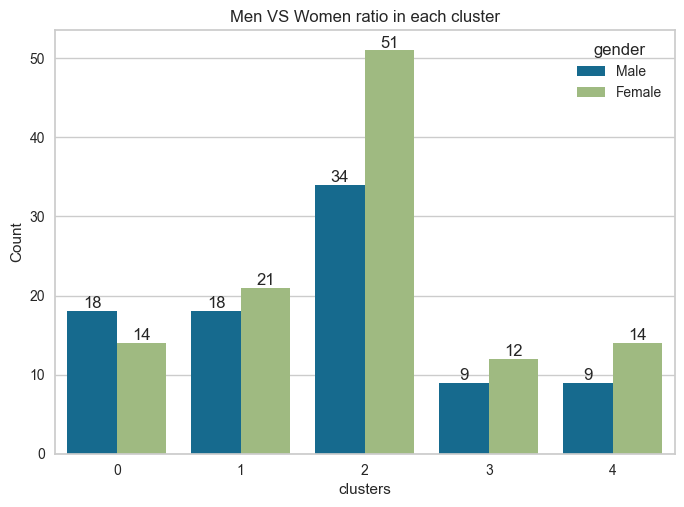

In [91]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax =sns.countplot(x=df_hie_income_score.clusters, hue=df_hie_income_score.gender)
for p in ax.containers:
    ax.bar_label(p)

In [92]:
df_hie_income_score.groupby(["gender", "clusters"]).mean()

customer_id        age     income      score
gender clusters                                              
Female 0          171.714286  43.785714  93.285714  20.642857
       1          163.333333  32.190476  86.047619  81.666667
       2           88.176471  40.509804  55.784314  48.647059
       3           20.833333  25.583333  24.583333  81.833333
       4           24.714286  43.214286  27.357143  21.714286
Male   0          162.000000  38.833333  86.388889  11.666667
       1          160.444444  33.277778  87.111111  82.666667
       2           87.470588  45.441176  55.852941  49.852941
       3           23.555556  25.000000  25.777778  77.666667
       4           20.333333  48.333333  24.666667  19.666667

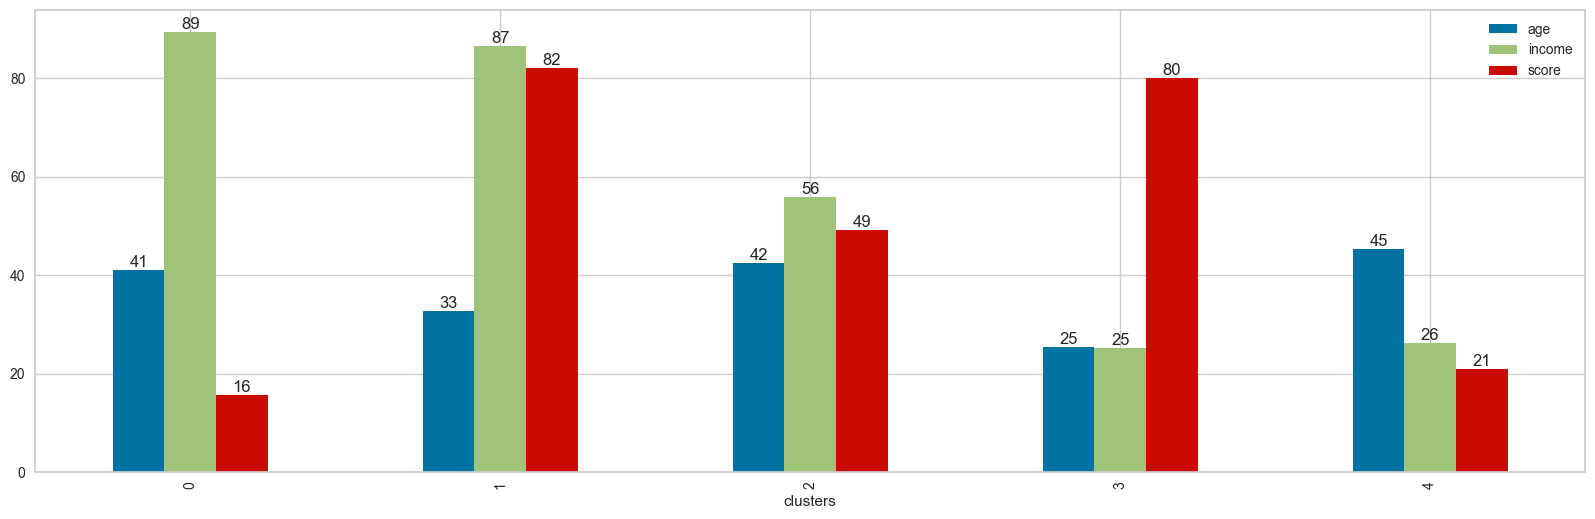

In [95]:
ax = df_hie_income_score.drop(columns = ["customer_id", 'gender'], axis = 1).groupby("clusters").mean().plot(kind='bar', figsize = (20,6))
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f")

##### When examined on a cluster basis, it is observed that the lowest score is in Cluster 0, the highest income is in Cluster 0, and the highest age is in Cluster 4 in terms of quantity.

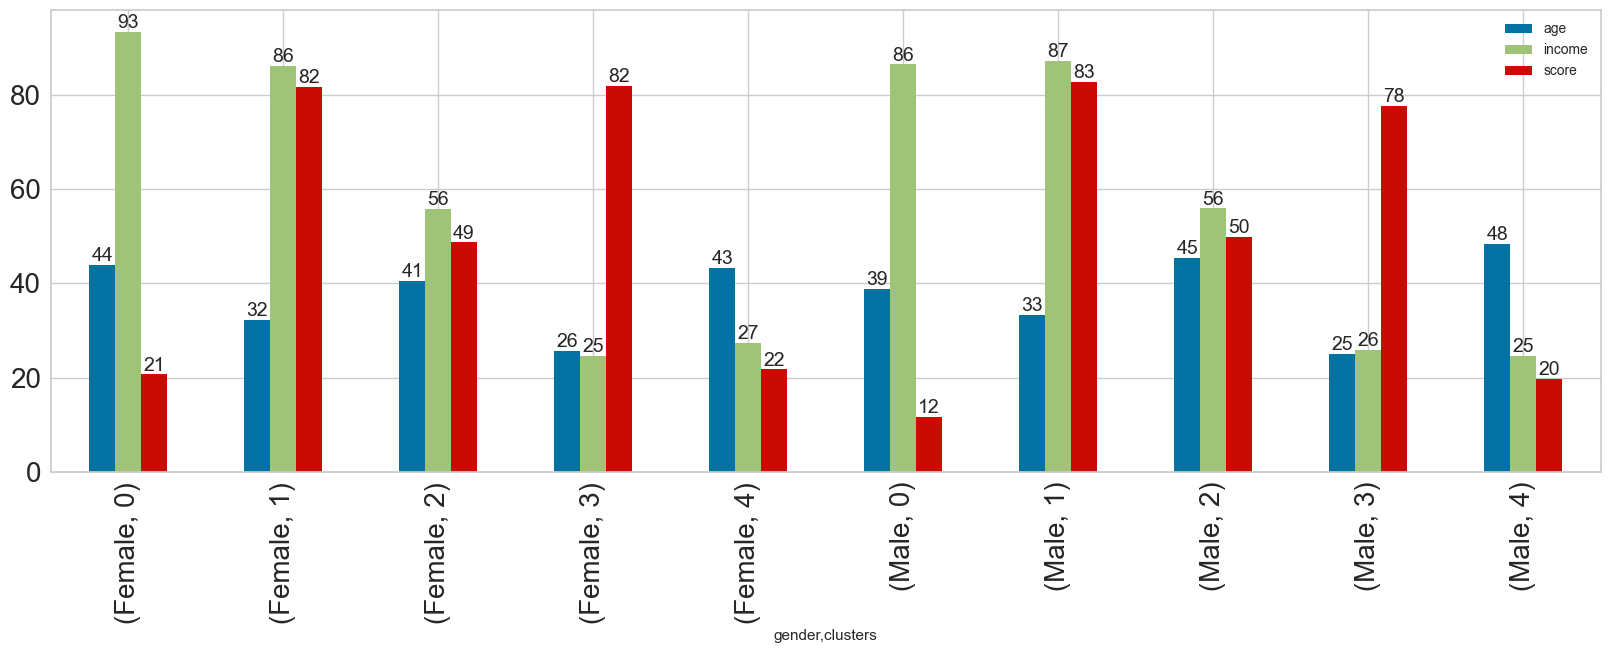

In [96]:
ax = df_hie_income_score.drop("customer_id", axis = 1).groupby(["gender", "clusters"]).mean().plot(kind="bar",
                                                                                figsize=(20,6),
                                                                                fontsize=20)
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=14)

###### Results

###### Age-Spending-Score: K-means clustering with 4 clusters provided effective segmentation.
###### Income-Spending-Score: Hierarchical clustering with 5 clusters demonstrated successful results.
###### Cluster Distributions: Some graphs, such as gender-based cluster distributions, exhibited similarities.
###### Graph Variances: Differences were observed in other graphs, emphasizing the need for tailored interpretations.
###### Cluster Analysis: Box plots and bar plots of clusters were scrutinized to convey insights.
###### Cluster Selection: The choice of the number of clusters depends on the nature of the problem, expert opinions, and interpretability.
###### It should be noted that the choice of the number of clusters will vary depending on the nature of the business problem, expert opinions, and the interpretability of clusters.